In [ ]:
import numpy as np # Used for numerical operations and handling arrays.
import pandas as pd # Used for handling structured data in the form of dataframes (like tables).
import os # Provides functions for interacting with the operating system (e.g., reading files, handling directories).
import zipfile # Allows working with ZIP files (e.g., extracting compressed datasets).
import glob # Used for finding file paths that match a specific pattern (e.g., *.txt to find all text files).
import matplotlib.pyplot as plt # A widely used library for creating plots, graphs, and charts.
import seaborn as sns # A visualization library built on top of matplotlib, used for making statistical graphs more appealing.
from sklearn.feature_extraction.text import CountVectorizer # Converts text data into numerical feature vectors using a bag-of-words approach.
from sklearn.naive_bayes import MultinomialNB # Imports the Naïve Bayes classifier, often used for text classification (e.g., spam detection).
from sklearn.metrics import accuracy_score # Used to evaluate the accuracy of a classification model.
from scipy.sparse import vstack # Used to efficiently stack sparse matrices (e.g., combining multiple text feature matrices).

In [ ]:
# Checks if the dataset file (smsspamcollection.zip) exists.
# If not found, it downloads the ZIP file silently (-q) from the UCI Machine Learning Repository.
if not os.path.exists('smsspamcollection.zip'):
    !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

# Checks if the extracted file (SMSSpamCollection) exists.
# If not found, it extracts the ZIP file into the current directory (.).
if not os.path.exists('SMSSpamCollection'):
    with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
        zip_ref.extractall('.')


# Reads the SMSSpamCollection file into a Pandas DataFrame.
# The data is tab-separated (\t) with no header (header=None).
# Column names are manually assigned:
# 'label' → Spam or ham (normal message).
# 'message' → The actual text of the SMS.
data_imported = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Converts the messages column into a NumPy array.
# Converts labels:
# "spam" → 1
# "ham" → 0
# This allows the model to work with numerical labels.
messages = np.array(data_imported['message'])
labels = np.where(data_imported['label'] == "spam", 1, 0)


# Prints the first few rows of the dataset (.head()).
# Prints dataset statistics (.describe()).
# Prints the first 5 messages (messages[:5]).
# Prints the first 5 labels (labels[:5]).
print(data_imported.head())
print("""
""")
print(data_imported.describe())
print("""
""")
print(messages[:5])
print("""
""")
print(labels[:5])

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


[0 0 1 0 0]


In [ ]:
# This code splits the dataset into a training set and a test set for machine learning.
split_index = int(0.8 * len(messages))

# len(messages): Gets the total number of SMS messages in the dataset. In this case, len(messages) = 5572.
# 0.8 * len(messages): Calculates 80% of the dataset (which will be used for training).
# 0.8 * 5572 = 4457.6
# int(...): Converts the result to an integer (4457), ensuring an exact index.
# Thus, split_index = 4457, meaning the first 4,457 messages are for training, and the remaining 1,115 messages (20%) are for testing.
training_messages_sms, test_messages_sms = messages[:split_index], messages[split_index:]
training_labels_sms, test_labels_sms = labels[:split_index], labels[split_index:]

In [ ]:

# Checks if the ZIP file already exists in the current directory.
# If not found, it downloads the dataset from Kaggle (venky73/spam-mails-dataset).
# The !kaggle datasets download command requires the Kaggle API to be configured on your system.
if not os.path.exists('spam-mails-dataset.zip'):
    !kaggle datasets download -d venky73/spam-mails-dataset


# Checks if the extracted folder exists.
# If not found:
# Creates the directory spam-mails-dataset/ if it doesn’t exist.
# Extracts the ZIP file into this directory using zipfile.ZipFile.
if not os.path.exists('spam-mails-dataset'):
    os.makedirs('spam-mails-dataset', exist_ok=True)
    with zipfile.ZipFile('spam-mails-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('spam-mails-dataset')


# Finds all .csv files inside spam-mails-dataset/.
# Stores the list of CSV file paths in csv_files.
csv_files = glob.glob('spam-mails-dataset/*.csv')

# Reads the first CSV file into a Pandas DataFrame.
# Uses encoding='latin-1' to prevent character encoding errors.
test_data = pd.read_csv(csv_files[0], encoding='latin-1')


# Different datasets use different column names for spam classification.
# Renames multiple possible column names:
# "v1", "Category", "spam" → "label" (indicating spam or not).
# "v2", "Message", "text" → "message" (containing the actual email text).
# errors='ignore': Prevents errors if a column does not exist.
test_data.rename(columns={'v1': 'label', 'v2': 'message', 'Category': 'label', 'Message': 'message', 'spam': 'label', 'text': 'message'}, inplace=True, errors='ignore')

# test_messages: Converts the email text into a NumPy array.
# test_labels:
# If "label" is "spam", assign 1 (spam).
# Otherwise, assign 0 (ham, meaning "not spam").
# This prepares the labels for machine learning models.
test_messages = np.array(test_data['message'])
test_labels = np.where(test_data['label'] == "spam", 1, 0)

# Prints the first 5 rows of the dataset.
print(test_data.head())
print("""
""")

# Prints basic statistics.
print(test_data.describe())
print("""
""")

# Prints the first 5 email messages.
print(test_messages[:5])
print("""
""")

# Prints the first 5 labels (0 = ham, 1 = spam).
print(test_labels[:5])

   Unnamed: 0 label                                            message  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000


["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease 

In [ ]:
# Split test data into two halves
# len(test_messages) gives the total number of test messages.
# // 2 ensures integer division, so mid_index represents the midpoint.
mid_index = len(test_messages) // 2
test_messages_1_email, test_messages_2_email = test_messages[:mid_index], test_messages[mid_index:]
test_labels_1_email, test_labels_2_email = test_labels[:mid_index], test_labels[mid_index:]

In [ ]:
def tokenize(text):
    # Makes all text lowercase to avoid case sensitivity issues (e.g., "Hello" and "hello" are treated the same).
    text = text.lower()
    # Defines a set of stopwords (common words that do not add meaning, like "the" or "and").
    # These words will be removed from the text.
    remove_words = {"this", "is", "a", "the", "as", "an", "are", "to", "for", "of", "and", "in", "on", "with"}  #Hyperparameters
    # Defines a set of punctuation marks to remove.
    punctuation = {'.', ',', '!', '?', ':', ';'}    #Hyper parameters
    # Splits the input text into words.
    # Removes stopwords and punctuation.
    # Joins the cleaned words back into a string.
    cleaned_words = ""
    for word in text.split():
        if word not in remove_words and word not in punctuation:
            cleaned_words += word + " "
    # The cleaned text is split again into individual words and returned as a list.
    text = cleaned_words.strip()
    return text.split()

# This function converts text messages into numerical feature vectors using the Bag-of-Words (BoW) model.
def text_to_bow_vector(messages):
    # Creates a NumPy matrix of zeros with:
    # Rows = Number of messages.
    # Columns = Size of the vocabulary (total unique words).
    # Each row will be a vector representation of a message.
    vectors = np.zeros((len(messages), len(vocabulary)), dtype=int)

    # Tokenizes each message.
    # Uses np.unique(words, return_counts=True) to:
    # Get unique words in the message.
    # Count their occurrences.
    for i, msg in enumerate(messages):
        words = tokenize(msg)
        unique_words, counts = np.unique(words, return_counts=True)
        # Loops through each unique word and its frequency count.
        # If the word exists in the vocabulary, updates the corresponding index in the vector.
        for word, count in zip(unique_words, counts):
            if word in word_to_index:
                vectors[i, word_to_index[word]] = count
    return vectors
    # Returns a NumPy matrix where:
    # Each row represents a message.
    # Each column represents a word in the vocabulary.
    # The values are word counts in the message.

In [ ]:
# Applies the tokenize function (explained before) to each message in training_messages.
# Removes stopwords & punctuation, and converts text into lowercase tokens.
# Stores results in tokenized_messages, which is a list of lists (each inner list contains tokenized words for a message).
tokenized_messages = [tokenize(msg) for msg in training_messages_sms]
# Flattens the tokenized_messages list to extract all words.
# Uses set() to remove duplicates.
# Converts it back into a list, which forms the vocabulary.
vocabulary = list(set(word for msg in tokenized_messages for word in msg))
# Creates a dictionary where each unique word is assigned an index.
# This is useful for later converting words into a numerical vector.
word_to_index = {word: i for i, word in enumerate(vocabulary)}

print(tokenized_messages[0])
print("""
""")
print(vocabulary[:5])
print("""
""")
print(list(word_to_index.items())[:5])

['go', 'until', 'jurong', 'point,', 'crazy..', 'available', 'only', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'cine', 'there', 'got', 'amore', 'wat...']


['orange', 'pie', 'lovers', 'sextextuk.com', 'attempt']


[('orange', 0), ('pie', 1), ('lovers', 2), ('sextextuk.com', 3), ('attempt', 4)]


In [ ]:
def classify_message(text):
    # Calls text_to_bow_vector([text]), which:
    # Tokenizes the text.
    # Converts it into a Bag-of-Words (BoW) vector based on the vocabulary.
    vector = text_to_bow_vector([text])[0]
    # P_spam and P_ham
    # These are the prior probabilities of a message being spam or ham.
    # Example: If 40% of training messages were spam, P_spam = 0.4 and P_ham = 0.6.
    # Taking log(P_spam) ensures numerical stability.
    # P_word_given_spam and P_word_given_ham
    # Arrays where each element represents the probability of a word appearing in spam or ham messages.
    log_prob_spam = np.log(P_spam) + vector @ np.log(P_word_given_spam)
    log_prob_ham = np.log(P_ham) + vector @ np.log(P_word_given_ham)
    # If the computed log-probability for spam (log_prob_spam) is higher, classify as "spam".
    # Otherwise, classify as "ham".
    prediction = "spam" if log_prob_spam > log_prob_ham else "ham"
    # Returns both the predicted label ("spam" or "ham") and the Bag-of-Words vector for the input message.
    return prediction, vector

In [ ]:
# training_messages: A list of text messages (both spam and ham).
# text_to_bow_vector(training_messages):
# Converts each message into a numerical Bag-of-Words (BoW) vector.
# X_train is a 2D NumPy array where:
# Rows = Messages.
# Columns = Words from the vocabulary.
# Each value represents the count of a word in the message.
X_train = text_to_bow_vector(training_messages_sms)
alpha = 1
# training_labels == 1: Selects only spam messages from X_train.
# training_labels == 0: Selects only ham messages from X_train.
# .sum(axis=0):
# Summing across all spam messages gives the total count of each word in spam.
# Same for ham messages.
# + alpha (Laplace smoothing):
# alpha = 1 ensures no word has zero probability (helps prevent division by zero).
# Without this, unseen words would have a probability of 0, making predictions unreliable.
spam_word_count = X_train[training_labels_sms == 1].sum(axis=0) + alpha
ham_word_count = X_train[training_labels_sms == 0].sum(axis=0) + alpha

# Sum up all spam words to get total_spam_words.
# Sum up all ham words to get total_ham_words.
total_spam_words = spam_word_count.sum()
total_ham_words = ham_word_count.sum()

# Divides each word count by the total count of words in spam or ham.
# This gives conditional probabilities:
# P_word_given_spam[i] = Probability that word i appears in a spam message.
# P_word_given_ham[i] = Probability that word i appears in a ham message.
P_word_given_spam = spam_word_count / total_spam_words
P_word_given_ham = ham_word_count / total_ham_words
# P_spam: Proportion of messages labeled as spam in training data.
# P_ham: Proportion of messages labeled as ham.
P_spam = np.mean(training_labels_sms)
P_ham = 1 - P_spam

print(spam_word_count[:5])
print("""
""")
print(ham_word_count[:5])
print("""
""")
print(total_spam_words)
print("""
""")
print(total_ham_words)
print("""
""")
print(P_word_given_spam[:5])

[19  1  1  2 16]


[4 2 2 1 3]


24336


59787


[7.80736358e-04 4.10913872e-05 4.10913872e-05 8.21827745e-05
 6.57462196e-04]


In [ ]:
def evaluate_model(test_messages, test_labels, classifier):
    """
    Evaluates the classifier on a given test dataset and computes accuracy, precision, recall, and F1-score.

    Parameters:
        test_messages (array): A list (or array) of test messages to classify.
        test_labels (array): The correct labels for the test messages (0 = ham, 1 = spam).
        classifier (function): A function that classifies a message (returns "spam" or "ham").

    Returns:
        dict: A dictionary containing accuracy, precision, recall, and F1-score.
    """
    # Get predictions for all test messages
    # For each test message, it calls classifier(msg), which returns ("spam" or "ham", vector).
    # It converts "spam" to 1 and "ham" to 0, storing the predictions in y_pred.
    y_pred = np.array([1 if classifier(msg)[0] == "spam" else 0 for msg in test_messages])

    # Compute metrics
    accuracy, precision, recall, f1_score = compute_matrics(test_labels, y_pred)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }


In [ ]:
def compute_matrics(y_true, y_pred):
    # Calculate True Positives: Spam correctly identified
    tp = np.sum((y_true == 1) & (y_pred == 1))

    # Calculate True Negatives: Non-spam correctly identified
    tn = np.sum((y_true == 0) & (y_pred == 0))

    # Calculate False Positives: Non-spam incorrectly marked as spam
    fp = np.sum((y_true == 0) & (y_pred == 1))

    # Calculate False Negatives: Spam incorrectly marked as non-spam
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Accuracy: the overall correctness of predictions
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Precision: Out of predicted spam, how many were actual spam?
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0

    # Recall: Out of actual spam, how many were correctly detected?
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    # F1 Score: Harmonic mean of precision and recall (recommended for tuning)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score


Alpha: 0.050000, F1-score: 0.9448
Alpha: 0.100000, F1-score: 0.9448
Alpha: 0.150000, F1-score: 0.9448
Alpha: 0.200000, F1-score: 0.9448
Alpha: 0.250000, F1-score: 0.9448
Alpha: 0.300000, F1-score: 0.9481
Alpha: 0.350000, F1-score: 0.9481
Alpha: 0.400000, F1-score: 0.9481
Alpha: 0.450000, F1-score: 0.9408
Alpha: 0.500000, F1-score: 0.9371
Alpha: 0.550000, F1-score: 0.9333
Alpha: 0.600000, F1-score: 0.9333
Alpha: 0.650000, F1-score: 0.9333
Alpha: 0.700000, F1-score: 0.9333
Alpha: 0.750000, F1-score: 0.9333
Alpha: 0.800000, F1-score: 0.9296
Alpha: 0.850000, F1-score: 0.9329
Alpha: 0.900000, F1-score: 0.9324
Alpha: 0.950000, F1-score: 0.9324
Alpha: 1.000000, F1-score: 0.9324
Alpha: 1.050000, F1-score: 0.9286
Alpha: 1.100000, F1-score: 0.9247
Alpha: 1.150000, F1-score: 0.9209
Alpha: 1.200000, F1-score: 0.9209
Alpha: 1.250000, F1-score: 0.9209
Alpha: 1.300000, F1-score: 0.9170
Alpha: 1.350000, F1-score: 0.9170
Alpha: 1.400000, F1-score: 0.9170
Alpha: 1.450000, F1-score: 0.9170
Alpha: 1.50000

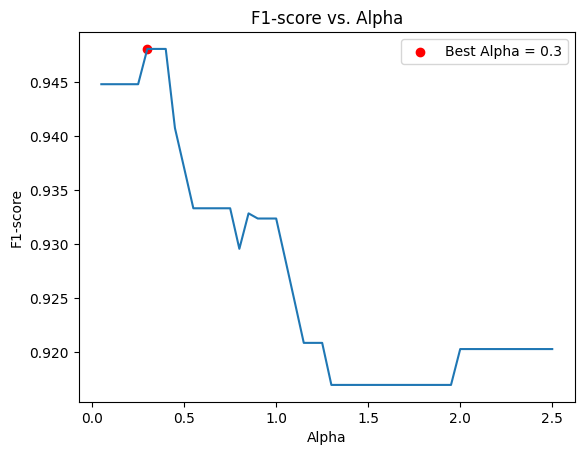

In [ ]:
# Function to calculate metrics including F1-score
def calculate_metrics(test_messages, test_labels):
    # Initialize an Empty List for Predictions
    y_pred = []
    # Loops through each msg in test_messages.
    # Uses classify_message(msg) to get the predicted label:
    # "spam" → 1
    # "ham" → 0
    # Stores these binary labels in y_pred.
    for msg in test_messages:
        predicted_label, _ = classify_message(msg)
        y_pred.append(1 if predicted_label == "spam" else 0)
    # y_true = test_labels: The actual labels (ground truth).
    # Calls compute_matrics(y_true, np.array(y_pred)) to calculate accuracy, precision, recall, and F1-score.
    y_true = test_labels
    return compute_matrics(y_true, np.array(y_pred))

# What It Does:
# Creates a list of alpha values from 0.05 to 2.5 in increments of 0.05.
# Alpha (Laplace smoothing) prevents zero probabilities in Naïve Bayes classification.
alpha_values = []
i = 0.05
while i <= 2.5:
  alpha_values.append(i)
  i += 0.05
f1_scores = []

# What It Does:
# For each alpha value:
# Recomputes spam & ham word probabilities with Laplace smoothing.
# Computes P(Word | Spam) and P(Word | Ham).
# Tests the classifier on test data.
# Stores the F1-score for each alpha.
# Prints the alpha and F1-score.
for alpha in alpha_values:
    # Recalculate probabilities for the current alpha
    spam_word_count = X_train[training_labels_sms == 1].sum(axis=0) + alpha
    ham_word_count = X_train[training_labels_sms == 0].sum(axis=0) + alpha
    total_spam_words = spam_word_count.sum()
    total_ham_words = ham_word_count.sum()
    P_word_given_spam = spam_word_count / total_spam_words
    P_word_given_ham = ham_word_count / total_ham_words

    # Calculate F1-score for the current alpha
    _, _, _, f1 = calculate_metrics(test_messages_sms, test_labels_sms)
    f1_scores.append(f1)
    print(f"Alpha: {alpha:4f}, F1-score: {f1:.4f}")

# Find the best alpha based on F1-score
# What It Does:
# Finds the alpha value with the highest F1-score.
# Prints the best alpha and its F1-score.
best_alpha = alpha_values[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)
print(f"\nBest Alpha (based on F1-score): {best_alpha}, Best F1-score: {best_f1:.4f}")

# Plotting the results
# What It Does:
# Plots the F1-score for different alpha values.
# Highlights the best alpha in red.
plt.plot(alpha_values, f1_scores)
plt.xlabel("Alpha")
plt.ylabel("F1-score")
plt.title("F1-score vs. Alpha")
plt.scatter(best_alpha, best_f1, color='red', label=f'Best Alpha = {best_alpha}')
plt.legend()
plt.show()


In [ ]:
# --------------------------------------------
# First Testing Phase (SMS Test Data)
# --------------------------------------------
# This variable keeps track of how many messages are correctly classified.
correct_predictions_sms_before = 0
predictions_sms_before = np.array([])
# Iterates through all test messages in test_messages_sms.
for i in range(len(test_messages_sms)):
    # Calls classify_message(), which likely uses a spam detection model to classify test_messages_sms[i].
    # The function returns:
    # predicted_label (either "spam" or "ham")
    # An unused second value (denoted by _).
    predicted_label, _ = classify_message(test_messages_sms[i])
    # test_labels_sms contains the actual labels (ground truth).
    # If the label is 1, it's considered "spam", otherwise, it's "ham".
    actual_label = "spam" if test_labels_sms[i] == 1 else "ham"
    # Compares the predicted label to the actual label.
    # If they match, the counter correct_predictions is incremented.
    if predicted_label == actual_label:
        correct_predictions_sms_before += 1

    if predicted_label == "spam":
        predictions_sms_before = np.append(predictions_sms_before, 1)
    else:
        predictions_sms_before = np.append(predictions_sms_before, 0)

# Calculates accuracy
sms_test_accuracy = correct_predictions_sms_before / len(test_messages_sms)
# Saves the initial accuracy for later comparison.
sms_test_accuracy_before = sms_test_accuracy
# Converts accuracy into a percentage and prints it with four decimal places.
print(f"Model Accuracy on SMS Test Data (before retraining): {sms_test_accuracy * 100:.4f} %")

# --------------------------------------------
# Second Testing Phase (Email Data)
# --------------------------------------------
# correct_predictions: Tracks how many emails are correctly classified.
# update_data: Stores feature vectors along with their actual labels for later use in model updates or retraining.
correct_predictions_email_before = 0
update_data = []
predictions_email_before = np.array([])
# Iterates through all test email messages stored in test_messages_1.
for i in range(len(test_messages_1_email)):
    # Calls classify_message(), which likely:
    # Analyzes test_messages_1[i] using a machine learning model.
    # Returns:
    # predicted_label (either "spam" or "ham").
    # vector, which could be the feature representation of the email (e.g., word frequencies, TF-IDF, or embeddings).
    predicted_label, vector = classify_message(test_messages_1_email[i])
    # Converts numerical labels into human-readable labels:
    # 1 → "spam"
    # 0 → "ham"
    actual_label = "spam" if test_labels_1_email[i] == 1 else "ham"
    # Compares predicted_label to actual_label.
    # If they match, it increases the correct_predictions counter.
    if predicted_label == actual_label:
        correct_predictions_email_before += 1
    # Stores the extracted vector along with the actual label.
    # This is likely used for retraining or fine-tuning the model.
    update_data.append((vector, actual_label))
    if predicted_label == "spam":
        predictions_email_before = np.append(predictions_email_before, 1)
    else:
        predictions_email_before = np.append(predictions_email_before, 0)



email_test_accuracy = correct_predictions_email_before / len(test_messages_1_email)
email_test_accuracy_before = email_test_accuracy
# Converts accuracy to a percentage and prints it with four decimal places.
print(f"Model Accuracy on Email Data (before retraining): {email_test_accuracy_before * 100:.4f} %")

# --------------------------------------------
# Update Model with Email Data
# --------------------------------------------
if update_data:
    update_vectors, update_labels = zip(*update_data)
    X_train = np.vstack([X_train, np.array(update_vectors)])
    training_labels = np.append(training_labels_sms, [1 if lbl == "spam" else 0 for lbl in update_labels])

    spam_word_count = X_train[training_labels == 1].sum(axis=0) + alpha
    ham_word_count = X_train[training_labels== 0].sum(axis=0) + alpha
    total_spam_words = spam_word_count.sum()
    total_ham_words = ham_word_count.sum()
    P_word_given_spam = spam_word_count / total_spam_words
    P_word_given_ham = ham_word_count / total_ham_words
    P_spam = np.mean(training_labels)
    P_ham = 1 - P_spam

# --------------------------------------------
# Final Testing Phase (Email and SMS Data)
# --------------------------------------------


correct_predictions_sms_after = 0
predictions_sms_after = np.array([])
# Iterates through all test messages in test_messages_sms.
for i in range(len(test_messages_sms)):
    # Calls classify_message(), which likely uses a spam detection model to classify test_messages_sms[i].
    # The function returns:
    # predicted_label (either "spam" or "ham")
    # An unused second value (denoted by _).
    predicted_label, _ = classify_message(test_messages_sms[i])
    # test_labels_sms contains the actual labels (ground truth).
    # If the label is 1, it's considered "spam", otherwise, it's "ham".
    actual_label = "spam" if test_labels_sms[i] == 1 else "ham"
    # Compares the predicted label to the actual label.
    # If they match, the counter correct_predictions is incremented.
    if predicted_label == actual_label:
        correct_predictions_sms_after += 1
    if predicted_label == "spam":
        predictions_sms_after = np.append(predictions_sms_after, 1)
    else:
        predictions_sms_after = np.append(predictions_sms_after, 0)

# Calculates accuracy
sms_final_accuracy = correct_predictions_sms_after / len(test_messages_sms)
print(f"Final Model Accuracy on SMS Test Data: {sms_final_accuracy * 100:.4f} %")


correct_predictions_email_after = 0
predictions_email_after = np.array([])
# Iterates through all test email messages stored in test_messages_1.
for i in range(len(test_messages_2_email)):
    predicted_label, _ = classify_message(test_messages_2_email[i])
    actual_label = "spam" if test_labels_2_email[i] == 1 else "ham"
    if predicted_label == actual_label:
        correct_predictions_email_after += 1
    if predicted_label == "spam":
        predictions_email_after = np.append(predictions_email_after, 1)
    else:
        predictions_email_after = np.append(predictions_email_after, 0)

email_final_accuracy = correct_predictions_email_after / len(test_messages_2_email)
print(f"Model Accuracy on Unseen Email Data: {email_final_accuracy * 100:.4f} %")


Model Accuracy on SMS Test Data (before retraining): 98.0269 %
Model Accuracy on Email Data (before retraining): 51.7988 %
Final Model Accuracy on SMS Test Data: 89.2377 %
Model Accuracy on Unseen Email Data: 92.4594 %


In [ ]:
print(predictions_sms_after)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:

# --------------------------------------------
# Preprocessing: Remove Empty Messages Before Vectorization
# --------------------------------------------
valid_indices = [i for i, msg in enumerate(training_messages_sms) if isinstance(msg, str) and msg.strip() != ""]
training_messages_sms_skl = training_messages_sms[valid_indices]
training_labels_sms_skl = training_labels_sms[valid_indices]
valid_indices_test = [i for i, msg in enumerate(test_messages_sms) if isinstance(msg, str) and msg.strip() != ""]

test_messages_sms_skl = test_messages_sms[valid_indices_test]
test_labels_sms_skl = test_labels_sms[valid_indices_test]
# Ensure training labels match messages after filtering
assert len(training_messages_sms_skl) == len(training_labels_sms_skl), "Mismatch after filtering: training_messages and training_labels must have the same number of samples."

# --------------------------------------------
# Convert Text Data to Bag-of-Words Representation
# --------------------------------------------
test_messages_1_email_skl = [msg for msg in test_messages_1_email if isinstance(msg, str) and msg.strip() != ""]
test_messages_2_email_skl = [msg for msg in test_messages_2_email if isinstance(msg, str) and msg.strip() != ""]
vectorizer = CountVectorizer()
X_train_sms_skl = vectorizer.fit_transform(training_messages_sms_skl)
X_test_sms_skl = vectorizer.transform(test_messages_sms_skl)
X_test_1_email_skl = vectorizer.transform(test_messages_1_email_skl)
X_test_2_email_skl = vectorizer.transform(test_messages_2_email_skl)

test_labels_1_email_skl = test_labels_1_email
test_labels_2_email_skl = test_labels_2_email

# Ensure training labels match training messages in length
assert X_train_sms_skl.shape[0] == len(training_labels_sms_skl), f"Mismatch: X_train has {X_train_sms_skl.shape[0]} samples but training_labels has {len(training_labels_sms_skl)} samples."

# --------------------------------------------
# Train Multinomial Naïve Bayes Model
# --------------------------------------------
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_sms_skl, training_labels_sms_skl)

# --------------------------------------------
# First Testing Phase (Baseline Accuracy)
# --------------------------------------------
prediction_sms_test_baseline = nb_classifier.predict(X_test_sms_skl)
accuracy_sms_test_baseline = accuracy_score(test_labels_sms_skl, prediction_sms_test_baseline)
print(f"Model Accuracy on SMS Test Data (before retraining): {accuracy_sms_test_baseline * 100:.4f} %")

prediction_email_test_baseline = nb_classifier.predict(X_test_1_email_skl)
accuracy_email_test_baseline = accuracy_score(test_labels_1_email_skl, prediction_email_test_baseline)
print(f"Model Accuracy on Email Test Data (before retraining): {accuracy_email_test_baseline * 100:.4f} %")

# --------------------------------------------
# Retrain Model Using Collected Data
# --------------------------------------------
update_vectors = X_test_1_email_skl # Uses first half of email test data for retraining
update_labels = test_labels_1_email_skl # Uses first half of email test data for retraining

# Ensure update_labels has the correct shape
assert update_vectors.shape[0] == len(update_labels), f"Mismatch: update_vectors has {update_vectors.shape[0]} samples but update_labels has {len(update_labels)} samples."

# Properly stack sparse matrices for retraining
X_train_extended = vstack([X_train_sms_skl, update_vectors])
y_train_extended = np.append(training_labels_sms_skl, update_labels)

# Retrains the model with updated data
nb_classifier.fit(X_train_extended, y_train_extended)

# --------------------------------------------
# Second Testing Phase After Retraining
# --------------------------------------------
predictions_2_email_baseline = nb_classifier.predict(X_test_2_email_skl)
accuracy_2_email_baseline = accuracy_score(test_labels_2_email_skl, predictions_2_email_baseline)
predictions_2_sms_baseline = nb_classifier.predict(X_test_sms_skl)
accuracy_2_sms_baseline = accuracy_score(test_labels_sms_skl, predictions_2_sms_baseline)

print(f"Scikit-Learn Model Accuracy after SMS second testing phase: {accuracy_2_sms_baseline * 100:.4f} %")
print(f"Scikit-Learn Model Accuracy after E-mail second testing phase: {accuracy_2_email_baseline * 100:.4f} %")



Model Accuracy on SMS Test Data (before retraining): 98.4753 %
Model Accuracy on Email Test Data (before retraining): 49.5938 %
Scikit-Learn Model Accuracy after SMS second testing phase: 93.4529 %
Scikit-Learn Model Accuracy after E-mail second testing phase: 93.8128 %


In [ ]:
# # --------------------------------------------
# # Second Testing Phase After Retraining
# # --------------------------------------------
# predictions_2 = nb_classifier.predict(X_test_2)
# accuracy_2 = accuracy_score(test_labels_2, predictions_2)

# predictions_2_email = nb_classifier.predict(X_test_1)
# accuracy_2_email = accuracy_score(test_labels_1, predictions_2_email)

# print(f"Scikit-Learn Model Accuracy on Unseen Email Test Data (2nd half): {accuracy_2 * 100:.4f} %")
# print(f"Scikit-Learn Model Accuracy on Email Test Data (after retraining): {accuracy_2_email * 100:.4f} %")

# Now predict again on SMS test set AFTER retraining:

def compute_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[tn, fp], [fn, tp]])

# Confusion matrices
confusion_matrix_sms_test_before_retraining = compute_confusion_matrix(test_labels_sms, predictions_sms_before)
confusion_matrix_email_test_before_retraining = compute_confusion_matrix(test_labels_1_email, predictions_email_before)
confusion_matrix_email_test_after_retraining = compute_confusion_matrix(test_labels_2_email, predictions_email_after)

# Correctly computed confusion matrix for SMS after retraining:
confusion_matrix_sms_test_after_retraining = compute_confusion_matrix(test_labels_sms, predictions_sms_after)

print("Email Test (Before retraining):\n", confusion_matrix_email_test_before_retraining)
print("SMS Test (Before retraining):\n", confusion_matrix_sms_test_before_retraining)
print("Email Test (After retraining on X_test_2):\n", confusion_matrix_email_test_after_retraining)
print("SMS Test (After retraining):\n", confusion_matrix_sms_test_after_retraining)


Email Test (Before retraining):
 [[1230  639]
 [ 607  109]]
SMS Test (Before retraining):
 [[966   4]
 [ 18 127]]
Email Test (After retraining on X_test_2):
 [[1750   53]
 [ 142  641]]
SMS Test (After retraining):
 [[856 114]
 [  6 139]]


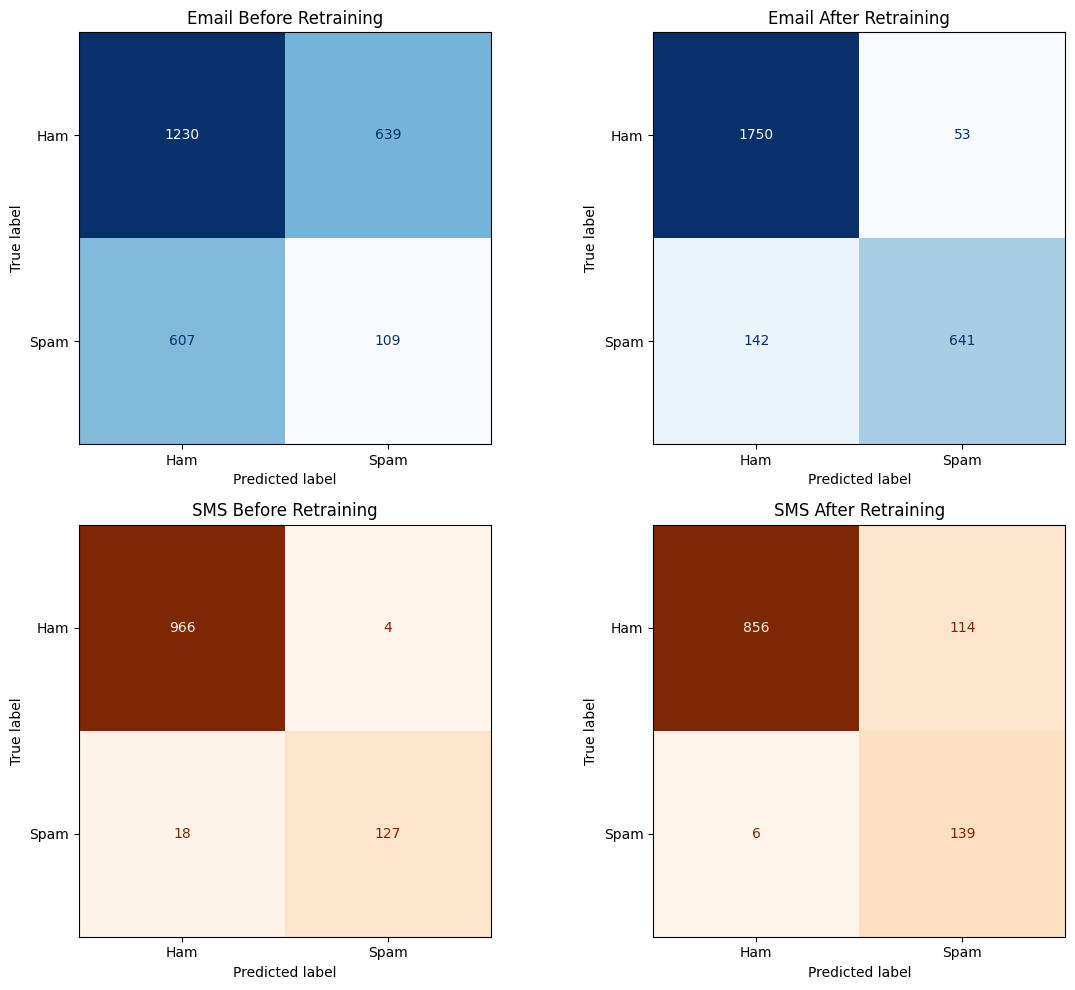

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Create a 2x2 figure: top row for Email, bottom row for SMS
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- (1) Email BEFORE Retraining (top-left) ---
disp_email_before = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_email_test_before_retraining,
    display_labels=["Ham", "Spam"]
)
disp_email_before.plot(ax=axes[0, 0], values_format='d', cmap='Blues', colorbar=False)
axes[0, 0].set_title("Email Before Retraining")

# --- (2) Email AFTER Retraining (top-right) ---
disp_email_after = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_email_test_after_retraining,
    display_labels=["Ham", "Spam"]
)
disp_email_after.plot(ax=axes[0, 1], values_format='d', cmap='Blues', colorbar=False)
axes[0, 1].set_title("Email After Retraining")

# --- (3) SMS BEFORE Retraining (bottom-left) ---
disp_sms_before = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_sms_test_before_retraining,
    display_labels=["Ham", "Spam"]
)
disp_sms_before.plot(ax=axes[1, 0], values_format='d', cmap='Oranges', colorbar=False)
axes[1, 0].set_title("SMS Before Retraining")

# --- (4) SMS AFTER Retraining (bottom-right) ---
disp_sms_after = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_sms_test_after_retraining,
    display_labels=["Ham", "Spam"]
)
disp_sms_after.plot(ax=axes[1, 1], values_format='d', cmap='Oranges', colorbar=False)
axes[1, 1].set_title("SMS After Retraining")

plt.tight_layout()
plt.show()


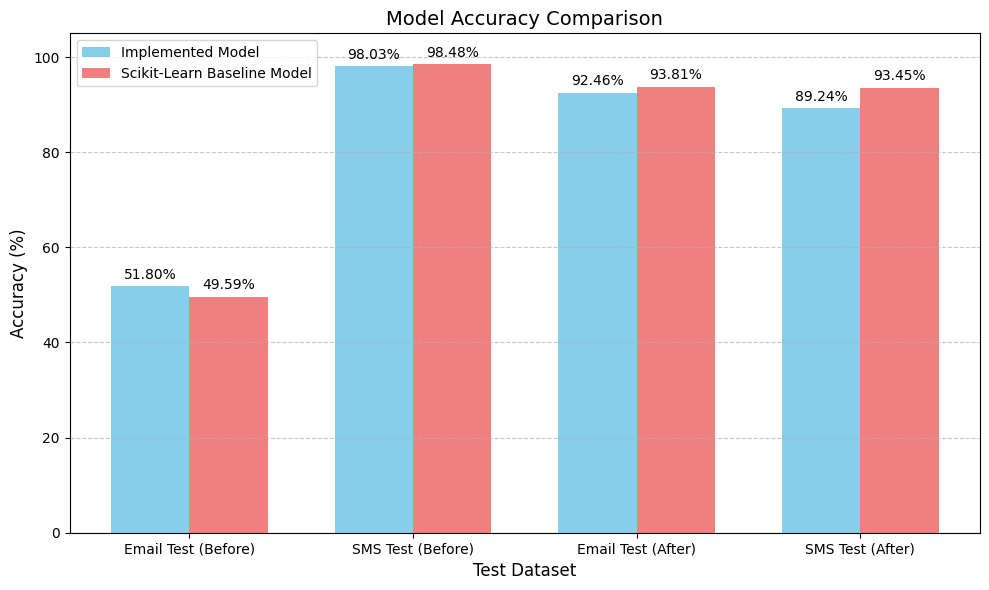

In [ ]:
accuracies_1 = [
    email_test_accuracy_before * 100,
    sms_test_accuracy_before * 100,
    email_final_accuracy * 100,
    sms_final_accuracy * 100
]
accuracies_2 = [
    accuracy_email_test_baseline * 100,
    accuracy_sms_test_baseline * 100,
    accuracy_2_email_baseline * 100,
    accuracy_2_sms_baseline * 100
]

labels = ['Email Test (Before)', 'SMS Test (Before)' , 'Email Test (After)', 'SMS Test (After)']

# Number of groups
n_groups = len(labels)

# Define positions for each group on the x-axis
x = np.arange(n_groups)

# Width of each bar (when grouped side by side)
bar_width = 0.35

# Create the figure and one set of axes
plt.figure(figsize=(10, 6))

# Plot first set of bars slightly to the left
plt.bar(x - bar_width/2, accuracies_1, width=bar_width,
        label='Implemented Model', color='skyblue')

# Plot second set of bars slightly to the right
plt.bar(x + bar_width/2, accuracies_2, width=bar_width,
        label='Scikit-Learn Baseline Model', color='lightcoral')

# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('Test Dataset', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xticks(x, labels, rotation=0)  # Rotate if needed
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend to differentiate the bars
plt.legend()

# Add percentage labels on top of each bar in Set 1
for i, v in enumerate(accuracies_1):
    plt.text(x[i] - bar_width/2, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# Add percentage labels on top of each bar in Set 2
for i, v in enumerate(accuracies_2):
    plt.text(x[i] + bar_width/2, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()